<a href="https://colab.research.google.com/github/ziyasarican/PythonMachineLearning/blob/main/classification/CompareForIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

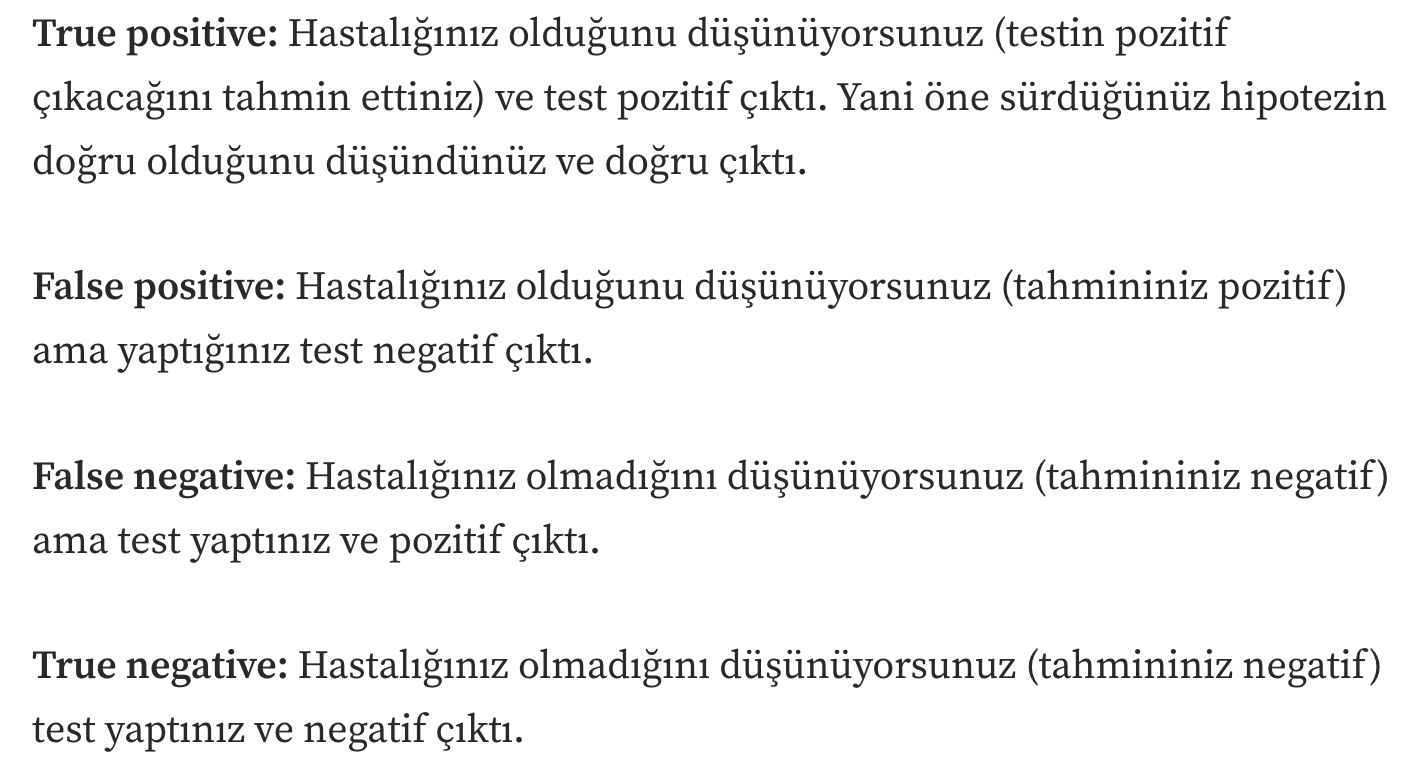

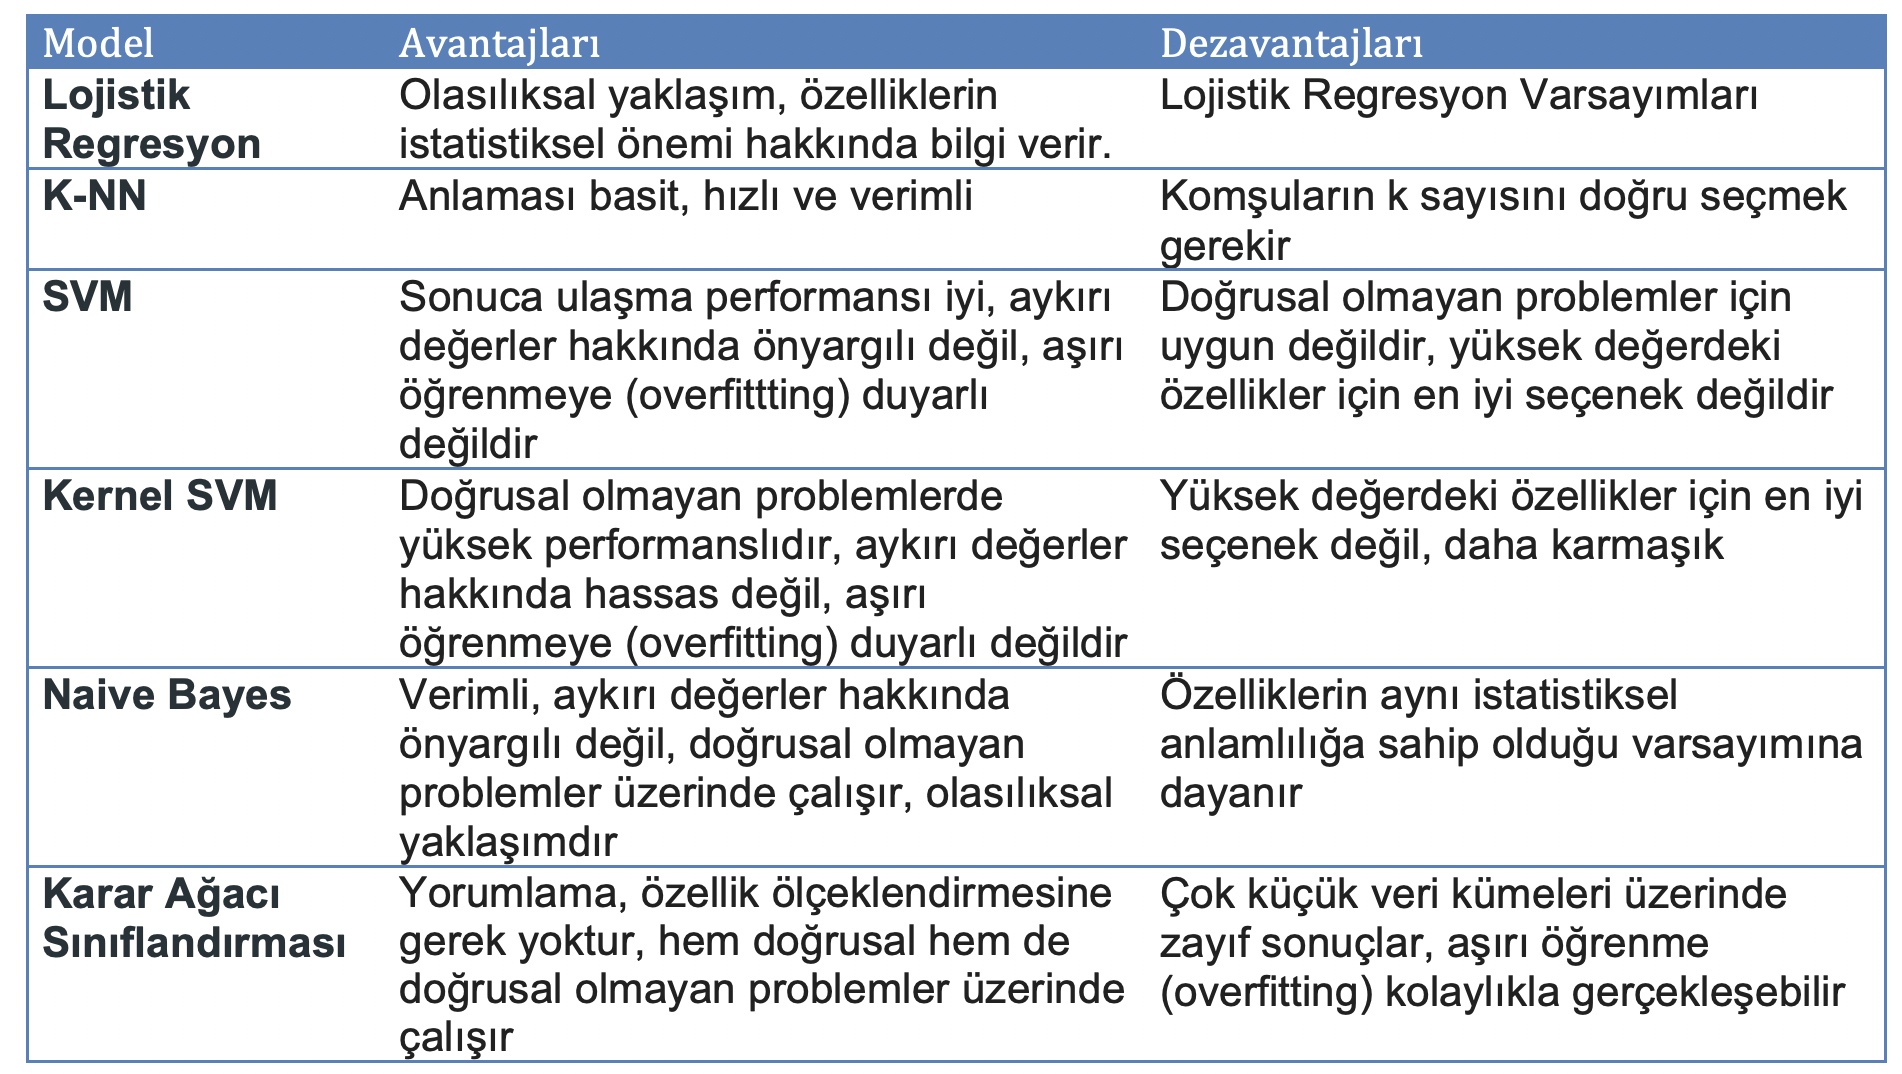

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Eksik veri kontrolü
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# Veri seti oluşturma
y = df.loc[:,["Species"]]
x = df.drop(["Species","Id"], axis=1)


In [5]:
# test-train oluşturma
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=0)
     

In [8]:
# Verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
y_pred_logReg = logReg.predict(x_test)
logReg.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.94

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


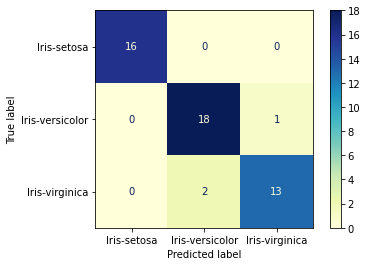

In [11]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(logReg, x_test, y_test, cmap = "YlGnBu")

In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors: bakılacak komşu sayısı. metric: mesafeyi hangi modelle ölçüleceği
KNN = KNeighborsClassifier(n_neighbors=5, metric="minkowski")
KNN.fit(x_train,y_train)
y_predKNN = KNN.predict(x_test)
KNN.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.96

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


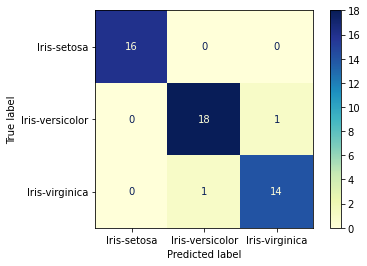

In [15]:
# Confusion Matrix
plot_confusion_matrix(KNN, x_test, y_test, cmap = "YlGnBu")

In [16]:
# SVM
from sklearn.svm import SVC
# rbf olarak bölsün
svc = SVC(kernel="rbf")
svc.fit(x_train,y_train)
y_predSVM = svc.predict(x_test)
svc.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.96

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


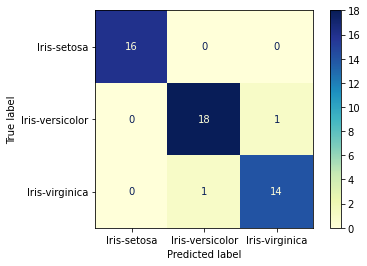

In [17]:
# Confusion Matrix
plot_confusion_matrix(svc, x_test, y_test, cmap = "YlGnBu")

In [18]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predGNB = gnb.predict(x_test)
gnb.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.96

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


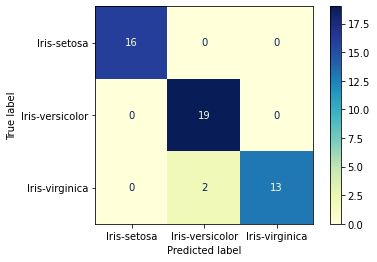

In [19]:
# Confusion Matrix
plot_confusion_matrix(gnb, x_test, y_test, cmap = "YlGnBu")

In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_predDTC = dtc.predict(x_test)
dtc.score(x_test, y_test)

0.96

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


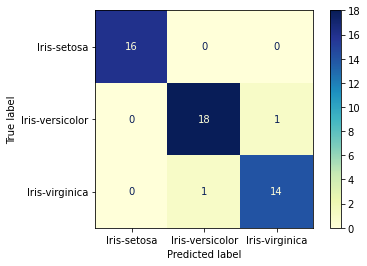

In [24]:
# Confusion Matrix
plot_confusion_matrix(dtc, x_test, y_test, cmap = "YlGnBu")

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion="entropy")
rfc.fit(x_train,y_train)
y_predRFC = rfc.predict(x_test)
rfc.score(x_test,y_test)

<ipython-input-27-30d5f538b4f9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


0.94

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


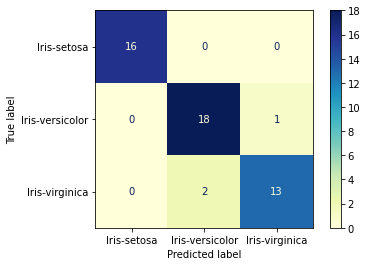

In [28]:
# Confusion Matrix
plot_confusion_matrix(rfc, x_test, y_test, cmap = "YlGnBu")